In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/IWS/Delivery/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Model 3

Model 3 is yet another classifier that predicts the level of NaOCl based on five factors:
1. H2S 
2. VFA
3. delta H2S
4. delta VFA
5. Flow_MGD

'Model 2 data.xlsx' --- Sheet 'H2S data': from 7/14/2017 ~ 8/22/2019, one sample every 15 min


In [ ]:
##Read in H2S
import pandas as pd
r1 = 'Model 2 data.xlsx'
H2S = pd.read_excel(r1, sheet_name='H2S data', index_col='Date')
H2S

,Time,DateTime,H2S_ppm
Date,,,
2017-07-14,10:36:55,2017-07-14 10:36:54.720,0
2017-07-14,10:51:55,2017-07-14 10:51:55.008,0
2017-07-14,11:06:55,2017-07-14 11:06:55.296,0
2017-07-14,11:21:55,2017-07-14 11:21:54.720,0
2017-07-14,11:36:55,2017-07-14 11:36:55.008,0
...,...,...,...
2019-08-22,06:30:44,2019-08-22 06:30:43.776,7
2019-08-22,06:45:44,2019-08-22 06:45:44.064,5
2019-08-22,07:00:44,2019-08-22 07:00:44.352,3


'WW for model 3 VFA prediction.xlsx' --- 5/16/2019 ~ 6/15/2019 daily VFA vaiues but most of them are missing: Only 4 VFA values.

In [ ]:
##Read in VFA
###r2 = 'WW for model 3 VFA prediction.xlsx'
r2 = 'WW-model 3-VFA-prediction.xlsx'
VFA = pd.read_excel(r2, header=3, index_col='Date')
VFA

,Temp,pH,ORP,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,SO4,SO3,VFA,orthoP,SO4-
Date,,,,,,,,,,,,,,,
2019-05-16,NaN,NaN,NaN,990,144,123,10.66,9.0,19.68,3.49,NaN,NaN,19.0,NaN,111.0
2019-05-17,NaN,NaN,NaN,1216,462,206,10.85,17.9,28.72,4.49,NaN,NaN,NaN,NaN,NaN
2019-05-18,NaN,NaN,NaN,826,79,81,10.44,8.6,19.00,2.17,NaN,NaN,NaN,NaN,NaN
2019-05-19,NaN,NaN,NaN,822,146,113,10.75,10.0,20.76,2.87,NaN,NaN,NaN,NaN,NaN
2019-05-20,NaN,NaN,NaN,894,110,93,12.18,9.0,21.15,2.36,78.0,NaN,36.0,NaN,94.0
2019-05-21,NaN,NaN,NaN,986,130,121,13.59,11.1,24.67,2.86,NaN,NaN,NaN,NaN,NaN
2019-05-22,NaN,NaN,NaN,788,142,111,8.59,8.5,17.12,2.98,NaN,NaN,NaN,NaN,NaN
2019-05-23,NaN,NaN,NaN,806,60,67,9.46,5.3,14.79,2.23,NaN,NaN,5.0,NaN,69.0
2019-05-24,NaN,NaN,NaN,832,114,92,8.93,6.1,15.05,1.96,NaN,NaN,NaN,NaN,NaN


In [ ]:
VFA.drop(['Temp', 'pH', 'ORP', 'orthoP', 'SO3', 'SO4', 'SO4-'], axis=1, inplace=True)
VFA

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,VFA
Date,,,,,,,,
2019-05-16,990,144,123,10.66,9.0,19.68,3.49,19.0
2019-05-17,1216,462,206,10.85,17.9,28.72,4.49,NaN
2019-05-18,826,79,81,10.44,8.6,19.00,2.17,NaN
2019-05-19,822,146,113,10.75,10.0,20.76,2.87,NaN
2019-05-20,894,110,93,12.18,9.0,21.15,2.36,36.0
2019-05-21,986,130,121,13.59,11.1,24.67,2.86,NaN
2019-05-22,788,142,111,8.59,8.5,17.12,2.98,NaN
2019-05-23,806,60,67,9.46,5.3,14.79,2.23,5.0
2019-05-24,832,114,92,8.93,6.1,15.05,1.96,NaN


In [ ]:
VFA = VFA.fillna(5)
VFA.shape

(31, 8)

Convert 15-min interval samples of H2S to its daily values: use a daily max as its daily value.

In [ ]:
H2S_Daily = H2S.groupby(pd.Grouper(freq='D')).max()
H2S_Daily

,Time,DateTime,H2S_ppm
Date,,,
2017-07-14,23:51:55,2017-07-14 23:51:55.296,0.0
2017-07-15,23:51:55,2017-07-15 23:51:55.296,0.0
2017-07-16,23:51:55,2017-07-16 23:51:55.296,7.0
2017-07-17,23:51:55,2017-07-17 23:51:55.296,10.0
2017-07-18,23:51:55,2017-07-18 23:51:55.296,140.0
...,...,...,...
2019-08-18,23:45:44,2019-08-18 23:45:43.776,53.0
2019-08-19,23:45:44,2019-08-19 23:45:43.776,25.0
2019-08-20,23:45:44,2019-08-20 23:45:43.776,32.0


In [ ]:
###joined_data = VFA.join(H2S.groupby(pd.Grouper(freq='D')).max(), how='outer')
joined_data = VFA.join(H2S_Daily, how='outer')
joined_data

,Total Solids,SS,BOD5,NH3,Org-N,TKN,P-TOT,VFA,Time,DateTime,H2S_ppm
Date,,,,,,,,,,,
2017-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:51:55,2017-07-14 23:51:55.296,0.0
2017-07-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:51:55,2017-07-15 23:51:55.296,0.0
2017-07-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:51:55,2017-07-16 23:51:55.296,7.0
2017-07-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:51:55,2017-07-17 23:51:55.296,10.0
2017-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:51:55,2017-07-18 23:51:55.296,140.0
...,...,...,...,...,...,...,...,...,...,...,...
2019-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:45:44,2019-08-18 23:45:43.776,53.0
2019-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:45:44,2019-08-19 23:45:43.776,25.0
2019-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23:45:44,2019-08-20 23:45:43.776,32.0


In [ ]:
joined_data = joined_data.drop(['Total Solids','SS','BOD5','NH3','Org-N','TKN','P-TOT','Time','DateTime'],axis=1)
###joined_data = joined_data.iloc[:-1]
joined_data.fillna(5,inplace=True)
joined_data

,VFA,H2S_ppm
Date,,
2017-07-14,5.0,0.0
2017-07-15,5.0,0.0
2017-07-16,5.0,7.0
2017-07-17,5.0,10.0
2017-07-18,5.0,140.0
...,...,...
2019-08-18,5.0,53.0
2019-08-19,5.0,25.0
2019-08-20,5.0,32.0


In [ ]:
###days = len(pd.date_range(start='5/16/2019', end='7/26/2019')) 
days = len(pd.date_range(start='5/16/2019', end='8/22/2019')) 
days_after = len(pd.date_range(start='7/27/2019', end='8/22/2019')) 
joined_data = joined_data.iloc[-days:-days_after]
joined_data

,VFA,H2S_ppm
Date,,
2019-05-16,19.0,27.0
2019-05-17,5.0,3.0
2019-05-18,5.0,0.0
2019-05-19,5.0,0.0
2019-05-20,36.0,30.0
...,...,...
2019-07-22,5.0,0.0
2019-07-23,5.0,2.0
2019-07-24,5.0,19.0


In [ ]:
import numpy as np
seed = 35
np.random.seed(seed=seed)
delta_data = []
for i in range(len(joined_data)-1):
    delta_data.append([0.796*joined_data.values[i][1]+6.0506-np.random.choice([5,10,20],1,p=[0.5,0.3,0.2])[0],
                       joined_data.values[i][1]-np.random.choice([0,5,10],1,p=[0.5,0.3,0.2])[0]])
delta_data = np.array(delta_data).astype('float32')
assert(delta_data.size == joined_data.size-2)

In [ ]:
delta_data

Time for NaOCl:

In [ ]:
##Read in VFA
r = 'NaOCl_data.xlsx'
naocl = pd.read_excel(r, sheet_name='Daily', index_col='date')
naocl

,NaOCl_GD,Flow_MGD,mg NaOCl/L flow,gal NaOCl/MGD flow,H2S_max,VFA
date,,,,,,
2017-07-12,NaN,NaN,NaN,NaN,NaN,1.067
2017-07-13,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-14,0.0,111.58,0.0,0.000000,0.0,NaN
2017-07-15,0.0,108.27,0.0,0.000000,0.0,NaN
2017-07-16,0.0,109.16,0.0,0.000000,7.0,NaN
...,...,...,...,...,...,...
2019-07-21,143.0,101.98,NaN,1.402236,1.0,NaN
2019-07-22,143.0,86.94,NaN,1.644813,0.0,NaN
2019-07-23,127.0,48.71,NaN,2.607268,2.0,NaN


In [ ]:
naocl.drop(['mg NaOCl/L flow','gal NaOCl/MGD flow','H2S_max','VFA'],axis=1,inplace=True)
naocl

,NaOCl_GD,Flow_MGD
date,,
2017-07-12,NaN,NaN
2017-07-13,NaN,NaN
2017-07-14,0.0,111.58
2017-07-15,0.0,108.27
2017-07-16,0.0,109.16
...,...,...
2019-07-21,143.0,101.98
2019-07-22,143.0,86.94
2019-07-23,127.0,48.71


In [ ]:
joined_data = joined_data.join(naocl,how='inner')
joined_data

,VFA,H2S_ppm,NaOCl_GD,Flow_MGD
2019-05-16,19.0,27.0,159.0,38.776042
2019-05-17,5.0,3.0,48.0,42.576042
2019-05-18,5.0,0.0,0.0,37.592708
2019-05-19,5.0,0.0,0.0,48.823958
2019-05-20,36.0,30.0,0.0,35.166667
...,...,...,...,...
2019-07-21,5.0,1.0,143.0,101.980000
2019-07-22,5.0,0.0,143.0,86.940000
2019-07-23,5.0,2.0,127.0,48.710000
2019-07-24,5.0,19.0,127.0,32.970000


In [ ]:
raw_naocl = joined_data['NaOCl_GD']
labels = []
# # every 20 gal
# for level in raw_naocl:
#     if level == 0:
#         labels.append(0)
#     elif level <= 20:
#         labels.append(1)
#     elif level <= 40:
#         labels.append(2)
#     elif level <= 60:
#         labels.append(3)
#     elif level <= 80:
#         labels.append(4)
#     elif level <= 100:
#         labels.append(5)
#     elif level <= 120:
#         labels.append(6)
#     elif level <= 140:
#         labels.append(7)
#     elif level <= 160:
#         labels.append(8)
#     elif level <= 180:
#         labels.append(9)
#     elif level <= 200:
#         labels.append(10)
#     elif level <= 220:
#         labels.append(11)    
#     else:
#         labels.append(12)
# every 10 gal
for level in raw_naocl:
    if level == 0:
        labels.append(0)
    elif level <= 10:
        labels.append(1)
    elif level <= 20:
        labels.append(2)
    elif level <= 30:
        labels.append(3)
    elif level <= 40:
        labels.append(4)
    elif level <= 50:
        labels.append(5)
    elif level <= 60:
        labels.append(6)
    elif level <= 70:
        labels.append(7)
    elif level <= 80:
        labels.append(8)
    elif level <= 90:
        labels.append(9)
    elif level <= 100:
        labels.append(10)
    elif level <= 110:
        labels.append(11)
    elif level <= 120:
        labels.append(12)
    elif level <= 130:
        labels.append(13)
    elif level <= 140:
        labels.append(14) 
    elif level <= 150:
        labels.append(15)
    elif level <= 160:
        labels.append(16)
    elif level <= 170:
        labels.append(17)
    elif level <= 180:
        labels.append(18)
    elif level <= 190:
        labels.append(19)
    elif level <= 200:
        labels.append(20)
    elif level <= 210:
        labels.append(21)
    elif level <= 220:
        labels.append(22)
    else:
        labels.append(23)


In [ ]:
delta_data.shape

(71, 2)

In [ ]:
joined_data_update = joined_data.drop('NaOCl_GD',axis=1)
joined_data.shape

(71, 4)

In [ ]:
data = np.hstack((joined_data_update, delta_data))
data[:5]

array([[ 19.        ,  27.        ,  38.77604167,  22.54260063,
         27.        ],
       [  5.        ,   3.        ,  42.57604167,   3.43860006,
          3.        ],
       [  5.        ,   0.        ,  37.59270833, -13.94939995,
          0.        ],
       [  5.        ,   0.        ,  48.82395833,  -3.94939995,
          0.        ],
       [ 36.        ,  30.        ,  35.16666667,  19.93059921,
         25.        ]])

In [ ]:
import sys
###sys.path.append("/home/xing/anaconda3/envs/keras/lib/python3.6/site-packages")
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(data, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from collections import Counter
sampling_info = sorted(Counter(y_resampled).items())
print(sampling_info)
y_resampled.size

[(0, 17), (4, 17), (5, 17), (7, 17), (8, 17), (10, 17), (12, 17), (13, 17), (15, 17), (16, 17), (18, 17), (20, 17), (21, 17), (23, 17)]


238

## Split

In [ ]:
jump = sampling_info[0][1]# jump should be the amount of data under each class
split = 0.2
test_amount = int(jump*split)

seed = 43
np.random.seed(seed=seed)
test_indices = []

# len(sampling_info) is the number of classes
for i in range(len(sampling_info)):
    test_indices += list(np.random.choice(np.arange(i*jump,(i+1)*jump),size=test_amount, replace=False))
    
assert(len(test_indices) == (len(sampling_info))*test_amount)
assert(len(set(test_indices)) == len(test_indices))

In [ ]:
train_indices = list(set(np.arange(len(y_resampled))).difference(set(test_indices)))
train_data, train_labels = X_resampled[train_indices], y_resampled[train_indices]
test_data, test_labels = X_resampled[test_indices], y_resampled[test_indices]

## Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
train_data.shape

(196, 5)

## Classification

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=seed)
param_grid = [{'n_estimators': [50,100], 'max_features':[1,2,3,5], 'bootstrap': [False]}]
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', return_train_score=True, n_jobs=-1)
grid_search.fit(train_data, train_labels)

best_rf = grid_search.best_estimator_

print(best_rf)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=43, verbose=0,
                       warm_start=False)


In [ ]:
predictions = best_rf.predict(test_data)
print(classification_report(test_labels, predictions))
print("Accuracy: %.2f%%"%((predictions==test_labels).sum()/test_labels.size*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         3
          13       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         3
          18       0.67      1.00      0.80         4
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00         4
          23       1.00      0.67      0.80         3

    accuracy                           0.90        42
   macro avg       0.83      0.83      0.83        42
weighted avg       0.90      0.90      0.90        42

Accuracy: 90.48%


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Attribute importance
d = dict(zip(['VFA','H2S','Flow_MGD','delta VFA','delta H2S'],best_rf.feature_importances_))
import operator
sorted_d = sorted(d.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_d)

[('Flow_MGD', 0.4413232495133641), ('delta H2S', 0.22674182553298125), ('delta VFA', 0.18622206661789428), ('H2S', 0.14225781318460207), ('VFA', 0.003455045151158225)]


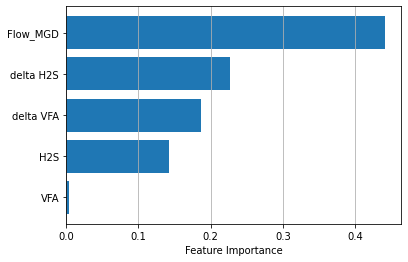

In [ ]:
#bar plot for feature importance
%matplotlib inline
import matplotlib.pyplot as plt
scores = []
Vars = []
for k,v in sorted_d[::-1]:
    scores.append(v)
    Vars.append(k)
plt.barh(np.arange(len(scores)), scores,align='center')
plt.yticks(np.arange(len(scores)), Vars)
plt.xlabel('Feature Importance')
plt.grid(True,axis='x')
plt.show()

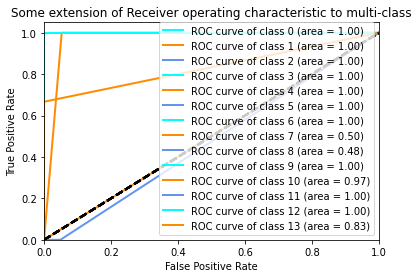

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import label_binarize
labels = [k for k,v in sorted(Counter(y_resampled).items())]
predictions = label_binarize(predictions,classes=labels)

test_labels_copy = label_binarize(test_labels,classes=labels)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(test_labels_copy[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
lw=2
for i, color in zip(range(len(labels)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()    

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
score = 'accuracy'
grid_search = GridSearchCV(SVC(random_state=seed), tuned_parameters, cv=5,
                   scoring= score, n_jobs=-1)
grid_search.fit(train_data, train_labels)
best_svm = grid_search.best_estimator_
print(best_svm)
predictions = best_svm.predict(test_data)
print(classification_report(test_labels, predictions))
print("Accuracy: %.2f%%"%((predictions==test_labels).sum()/test_labels.size*100))

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=43, shrinking=True, tol=0.001,
    verbose=False)
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         4
           5       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3
           8       1.00      0.20      0.33         5
          10       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         3
          13       0.33      0.50      0.40         2
          15       0.00      0.00      0.00         1
          16       1.00      0.67      0.80         3
          18       0.67      0.50      0.57         4
          20       1.00      1.00      1.00         3
          21       1.00      1.00      1.00  